In [17]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# Importing data with pandas
data = pd.read_csv('free_fall_data.csv')
data

,t,x,v_{x},a_{x},Ep,Ec,Em
0,0.000000,0.949263,NaN,NaN,4.697903,NaN,NaN
1,0.033333,0.943135,-0.408654,NaN,4.667576,0.042167,4.709743
2,0.066667,0.922020,-0.761373,-9.820954,4.563075,0.146371,4.709446
3,0.100000,0.892377,-1.045494,-9.019625,4.416374,0.275997,4.692371
4,0.133333,0.852320,-1.365627,-9.585636,4.218131,0.470896,4.689028
5,0.166667,0.801335,-1.686614,-9.783743,3.965808,0.718278,4.684086
6,0.200000,0.739879,-2.014881,-10.180986,3.661661,1.025086,4.686747
7,0.233333,0.667010,-2.366102,-10.094658,3.301032,1.413606,4.714637
8,0.266667,0.582139,-2.693749,-9.424886,2.881005,1.832212,4.713218
9,0.300000,0.487427,-2.989698,-9.181377,2.412274,2.256919,4.669193


In [19]:
# Saving and recollecting the data

#Cinematics data
t = np.array(data['t'])
x = np.array(data['x'])
v = np.array(data.loc[1:12,'v_{x}'])
t_v = np.array(data.loc[1:12,'t'])

#Energies data
Ep = np.array(data['Ep'])
K = np.array(data.loc[1:12, 'Ec'])
E = np.array(data.loc[1:12, 'Em'])

m=0.505

In [20]:
print(K)

[0.04216693 0.1463714  0.2759973  0.4708963  0.71827816 1.02508602
 1.41360573 1.83221208 2.2569188  2.75554945 3.34698878 4.05311157]


In [21]:
# Creating the data for the fits
time = np.linspace(0,t[-1],1000) #Time data

x_fit = -4.886728440847673*time**2 -0.07131505762501927*time + 0.9492813166912651

v_fit = -9.775185042585475*time -0.0746595666412962

# Potential Energy fit
g_fit1 = 9.786719436251676
h0_fit1 = 0.9505694902299415
v0_fit1 = -0.07141183483492576
Ep_fit = m*g_fit1*(h0_fit1+v0_fit1*time-1/2*g_fit1*time**2)

# Kinetic Energy fit
g_fit2 = 9.89537170336549
v0_fit2 = -0.036613955894435404
K_fit = 1/2*m*(v0_fit2 + g_fit2*time)**2

#Mechanial Energy fit
h0_fit3 = 0.9493565994854214
v0_fit3 = 0.002639516006030878
g_fit3 = 9.802407902966353
E_fit = (m*g_fit3*h0_fit3 + 1/2*m*v0_fit3**2)*np.ones(1000)

In [22]:
# Cerating the theoretic data

#Parameters
h0 = 0.9492813166912651
g = 9.8
v0 = -0.0746595666412962

#Data
x_theory = h0 + v0*time - 1/2*g*time**2
v_theory = v0 - g*time
Ep_theory = m*g*x_theory
K_theory = 1/2*m*v_theory**2
E_theory = Ep_theory+K_theory

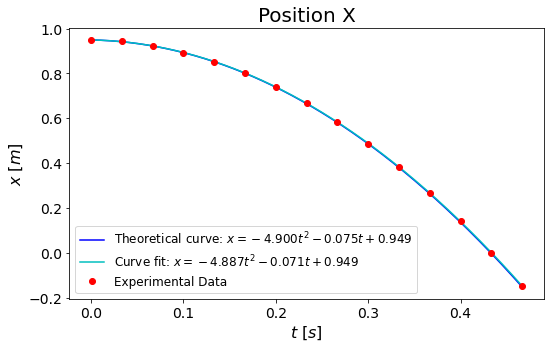

In [34]:
plt.figure(figsize=(8.5, 5))
plt.plot(time, x_theory,'b',label='Theoretical curve: $x = %.3ft^2 %.3ft + %.3f$'%(-1/2*g, v0, h0) )
plt.plot(time, x_fit,'c',label='Curve fit: $x = %.3ft^2 %.3ft + %.3f$'%(-4.886728440847673,-0.07131505762501927,0.9492813166912651))
plt.plot(t, x,'or',label='Experimental Data')

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Position X', fontsize = 20)
plt.legend(fontsize = 12)

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$x$ [$m$]', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('fre_fall_x.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

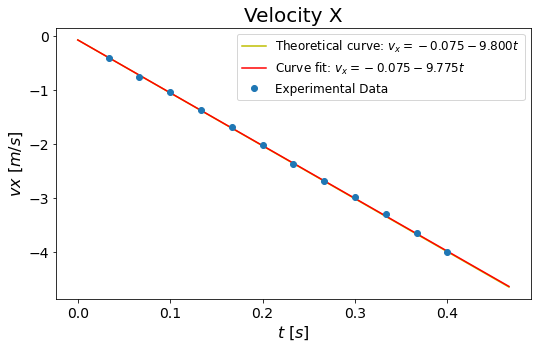

In [33]:
plt.figure(figsize=(8.5, 5))
plt.plot(time, v_theory,'y',label='Theoretical curve: $v_x = %.3f %.3ft$'%(v0,-g) )
plt.plot(time, v_fit,'r',label='Curve fit: $v_x = %.3f %.3ft$'%( -0.0746595666412962, -9.775185042585475))
plt.plot(t_v, v,'o',label='Experimental Data')

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Velocity X', fontsize = 20)
plt.legend(fontsize = 12)

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$vx$ [$m/s$]', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('fre_fall_vx.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

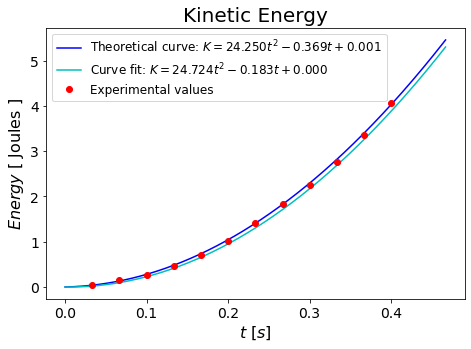

In [35]:
plt.figure(figsize=(7.5, 5))
plt.plot(time, K_theory,'b',label='Theoretical curve: $K = %.3ft^2  %.3ft + %.3f$'%(1/2*m*g**2,m*v0*g,1/2*m*v0**2) )
plt.plot(time, K_fit,'c',label='Curve fit: $K = %.3ft^2  %.3ft + %.3f$' %(1/2*m*g_fit2**2,m*v0_fit2*g_fit2,1/2*m*v0_fit2**2))
plt.plot(t_v, K,'or',label='Experimental values')

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Kinetic Energy', fontsize = 20)
plt.legend(fontsize = 12)

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$Energy$ $[$ Joules $]$', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('fre_fall_K.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

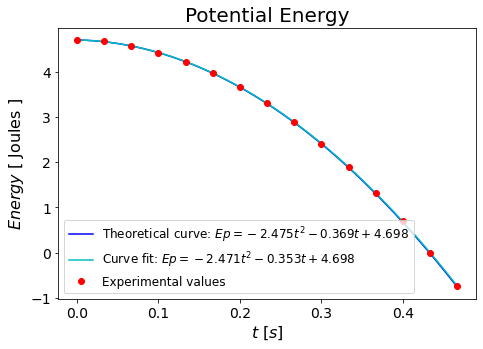

In [36]:
plt.figure(figsize=(7.5, 5))
plt.plot(time, Ep_theory,'b',label='Theoretical curve: $Ep = %.3ft^2  %.3ft + %.3f$'%(-1/2*m*g, m*v0*g, m*g*h0))
plt.plot(time, Ep_fit,'c',label='Curve fit: $Ep = %.3ft^2  %.3ft + %.3f$'%(-1/2*m*g_fit1, m*v0_fit1*g_fit1, m*g_fit1*h0_fit1))
plt.plot(t, Ep,'or',label='Experimental values')

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Potential Energy', fontsize = 20)
plt.legend(fontsize = 12)

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$Energy$ $[$ Joules $]$', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('fre_fall_Ep.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

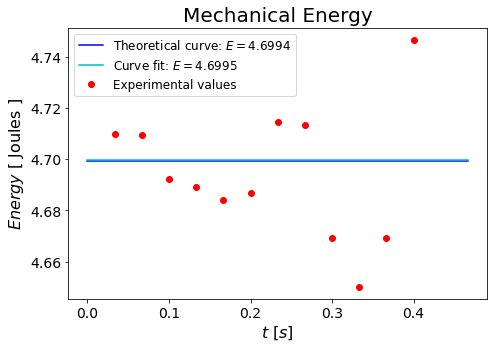

In [55]:
plt.figure(figsize=(7.5, 5))
plt.plot(time, E_theory,'b',label='Theoretical curve: $E = %.4f$'%(m*g*h0+1/2*m*v0**2))
plt.plot(time, E_fit,'c',label='Curve fit: $E = %.4f$'%(m*g_fit3*h0_fit3+1/2*m*v0_fit3**2))
plt.plot(t_v, E,'or',label='Experimental values')

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Mechanical Energy', fontsize = 20)
plt.legend(fontsize = 12)

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$Energy$ $[$ Joules $]$', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('fre_fall_E.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

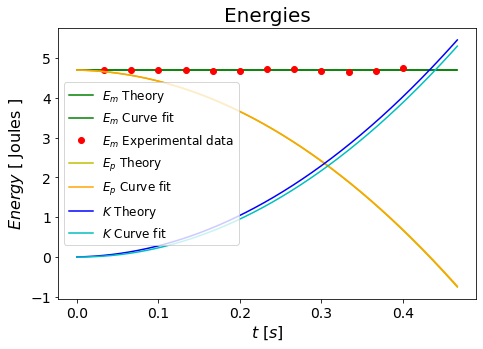

In [54]:
plt.figure(figsize=(7.5, 5))
plt.plot(time, E_theory,'g',label='$E_m$ Theory')
plt.plot(time, E_fit,'g',label='$E_m$ Curve fit' )
plt.plot(t_v, E,'or',label='$E_m$ Experimental data')
plt.plot(time, Ep_theory,'y',label='$E_p$ Theory')
plt.plot(time, Ep_fit,'orange',label='$E_p$ Curve fit')
plt.plot(time, K_theory,'b',label='$K$ Theory' )
plt.plot(time, K_fit,'c',label='$K$ Curve fit')


#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Energies', fontsize = 20)
plt.legend(fontsize = 12)

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$Energy$ $[$ Joules $]$', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('fre_fall_Energies.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

In [12]:
# Encontrando la desviación estándar de las diferencias entre el modelo teórico (ecuaciones teóricas) y experimental (ecuaciones de ajuste)

# Se calculan los valores de teoricos 'xt' y 'vt' y los experimentales 'xe' y 've'
xt = h0 + v0*t - 1/2*g*t**2
vt = v0 - g*t
xe = -4.886728440847673*t**2 -0.07131505762501927*t + 0.9492813166912651
ve = -9.775185042585475*t-0.0746595666412962

#Se calculan las diferencias entre los puntos de ambos modelos
dx = (xt-xe)
dv = (vt-ve)

#Se calcula el promedio de las diferencias
N = np.size(xt)
prom = np.sum(dx)/N
N1 = np.size(vt)
prom1 = np.sum(dv)/N


# Se calcula la desviación estándar con el valor 'rms' (media cuadrática) y 'prom' (promedio)
rms = np.sum(dx**2)/N
desviacion = np.sqrt(rms-prom**2)
rms1 = np.sum(dv**2)/N1
desviacion1 = np.sqrt(rms1-prom1**2)


print('desviación x = ', desviacion)
print('desviación vx = ', desviacion1)

desviación x =  0.0013952139120962284
desviación vx =  0.0035737623210650555


In [13]:
# Encontrando la desviación estándar de las diferencias entre el modelo teórico (ecuaciones teóricas) y experimental (ecuaciones de ajuste)

# Se calculan los valores de teoricos 'xt' y 'vt' y los experimentales 'xe' y 've'
x_theory = h0 + v0*t_v - 1/2*g*t_v**2
v_theory = v0 - g*t_v
E_the = m*g*x_theory + 1/2*m*v_theory**2

E_exp = E


#Se calculan las diferencias entre los puntos de ambos modelos
dx = abs(E_exp-E_the)

#Se calcula el promedio de las diferencias
N = np.size(E_the)
prom = np.sum(dx)/N

# Se calcula la desviación estándar
desviacion = np.sqrt(sum((prom-dx)**2)/(N-1))
error = (desviacion)/4.6994*100

print('desviación E = ', desviacion)

desviación E =  0.01469188446108148


In [14]:
error

0.312633197026886